In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from resnets_utils import *

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint


Using TensorFlow backend.


        B2E
0       0.7
1       0.9
2       0.9
3       0.9
4       0.8
...     ...
524535  0.1
524536  0.1
524537  0.1
524538  0.1
524539  0.1

[524540 rows x 1 columns]
     N    M    A    E
0  1.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0
    WHE    N    M    A    E
0  60.7  1.0  0.0  0.0  0.0
1  60.7  1.0  0.0  0.0  0.0
2  60.6  1.0  0.0  0.0  0.0
3  44.7  1.0  0.0  0.0  0.0
4  44.7  1.0  0.0  0.0  0.0


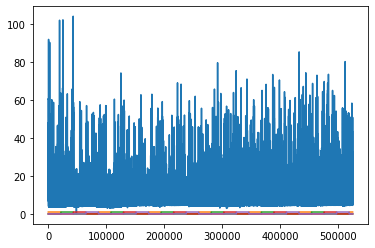

In [0]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
 

df = pd.read_csv("/content/gdrive/My Drive/ampds/data/data.csv")
from sklearn.model_selection import train_test_split
import tensorflow as tf

X=df.iloc[:524540,1:2]
y=df.iloc[:524540,3:4]
print(y)
l=[]
for i in range(0,524540):
  chk=i%86400
  if(chk<21600):
    l.append(0)
  elif (21600<=chk<43200):
    l.append(1)
  elif (43200<=chk<64800):
    l.append(2)
  else:
    l.append(3)
encoded = to_categorical(l)
dataset = pd.DataFrame({'N': encoded[:, 0], 'M': encoded[:, 1], 'A': encoded[:, 2], 'E': encoded[:, 3]})
print(dataset.head())

df = pd.concat([X, dataset], axis=1)
print(df.head())
import matplotlib.pyplot as plt
plt.plot(df)
plt.show()

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
dataset = df.values
dataset = df.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print (dataset)

[[0.58253361 1.         0.         0.         0.        ]
 [0.58253361 1.         0.         0.         0.        ]
 [0.5815739  1.         0.         0.         0.        ]
 ...
 [0.30998081 1.         0.         0.         0.        ]
 [0.31381959 1.         0.         0.         0.        ]
 [0.31285988 1.         0.         0.         0.        ]]


In [0]:
datay = y.values
datay = y.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
datay = scaler.fit_transform(datay)
print (datay)
print(datay.shape)

[[0.08235294]
 [0.10588235]
 [0.10588235]
 ...
 [0.01176471]
 [0.01176471]
 [0.01176471]]
(524540, 1)


In [0]:
dataset = dataset.reshape((dataset.shape[0], dataset.shape[1], 1,1))
print(dataset.shape)

(524540, 5, 1, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, datay, test_size=0.10)
print(X_train.shape)
print(y_train.shape)

(472086, 5, 1, 1)
(472086, 1)


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [0]:
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (5,1,1))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)


from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])



ValueError: ignored

In [0]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
history=model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 472086 samples, validate on 52454 samples
Epoch 1/50
 - 11s - loss: 8.3360e-04 - val_loss: 8.4274e-04
Epoch 2/50
 - 11s - loss: 7.8557e-04 - val_loss: 7.8650e-04
Epoch 3/50
 - 11s - loss: 7.7367e-04 - val_loss: 7.8145e-04
Epoch 4/50
 - 11s - loss: 7.7035e-04 - val_loss: 7.7795e-04
Epoch 5/50
 - 11s - loss: 7.6866e-04 - val_loss: 7.8022e-04
Epoch 6/50
 - 11s - loss: 7.6718e-04 - val_loss: 7.8016e-04
Epoch 7/50
 - 11s - loss: 7.6526e-04 - val_loss: 7.7846e-04
Epoch 8/50
 - 11s - loss: 7.6304e-04 - val_loss: 7.7769e-04
Epoch 9/50
 - 11s - loss: 7.6233e-04 - val_loss: 7.7940e-04
Epoch 10/50
 - 11s - loss: 7.6167e-04 - val_loss: 7.8162e-04
Epoch 11/50
 - 11s - loss: 7.6155e-04 - val_loss: 7.7936e-04
Epoch 12/50
 - 11s - loss: 7.6065e-04 - val_loss: 7.8198e-04
Epoch 13/50
 - 11s - loss: 7.6000e-04 - val_loss: 7.8168e-04
Epoch 14/50
 - 11s - loss: 7.5946e-04 - val_loss: 7.8187e-04
Epoch 15/50
 - 11s - loss: 7.5864e-04 - val_loss: 7.7914e-04
Epoch 16/50
 - 11s - loss: 7.5796e-04 - val

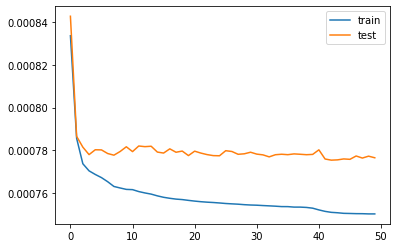

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate

yhat = model.predict(X_test)
print(yhat)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
# inv_yhat = concatenate((yhat, test[:, 1:]), axis=1)
# inv=inv_yhat
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# testy = testy.reshape((len(testy), 1))
# inv_y = concatenate((testy, test[:, 1:]), axis=1)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

[[0.03332122]
 [0.02838878]
 [0.06045851]
 ...
 [0.03947836]
 [0.02772163]
 [0.03233481]]
Test RMSE: 0.028
